# 逻辑回归

逻辑分布函数，形状类似 sigmoid 函数，以点 $(\mu, \frac{1}{2})$ 中心对称

$$
F(x)=P(X \leq x)=\frac{1}{1+e^{-(x-\mu)/\gamma}}
$$

密度函数

$$
f(x)=F'(x)=\frac{e^{-(x-\mu)/\gamma}}{\gamma(1+e^{-(x-\mu)/\gamma})^2}
$$

二项逻辑回归模型条件概率分布如下：

$$
P(Y=1|x)=\frac{exp(w \cdot x + b)}{1 + exp(w \cdot x + b)} \\
P(Y=0|x)=\frac{1}{1 + exp(w \cdot x + b)}
$$


约定
$$
P(Y=1|x) = \hat y \\
P(Y=0|x) = 1 - \hat y
$$

根据 0-1 分布特点，合并上式得到

$$
P(y|x) = {\hat y}^y(1-\hat y)^{1-y}
$$


损失函数

$$
L(w)=-(y\log{\hat y} + (1-y)\log(1-\hat y))
$$

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df_iris = load_iris(as_frame=True, return_X_y=True)
x = np.array(df_iris[0].iloc[:100, :2])
y = np.array(df_iris[1].iloc[:100])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

step 0/2000 loss: 1.0809041620260023
step 200/2000 loss: 0.06331217116026336
step 400/2000 loss: 0.05959949657467041
step 600/2000 loss: 0.05687497077271551
step 800/2000 loss: 0.05468152775980306
step 1000/2000 loss: 0.0528096360603589
step 1200/2000 loss: 0.05115040548494609
step 1400/2000 loss: 0.04964205671932758
step 1600/2000 loss: 0.04824716995781984
step 1800/2000 loss: 0.04694188690154664


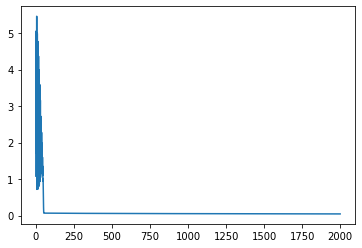

In [4]:
class LogisticRegression():

    def __init__(self):
        self.w = None
        self.b = None

    def sigmoid(self, x):
        return 1. / (1 + np.exp(-x))

    def output(self, x):
        z = np.dot(self.w, x.T) + self.b
        return self.sigmoid(z)

    def compute_loss(self, x, y):        
        y_hat = self.output(x)
        loss = np.mean(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
        dw = np.dot((y_hat - y), x)
        db = np.sum(y_hat - y)
        return loss, dw, db

    def train(self, x, y, lr=0.01, num_iter=1000):
        num_features = x.shape[1]
        self.w = np.random.randn(1, num_features)
        self.b = np.zeros(1)
        loss = []
        for i in range(num_iter):
            loss_i, dw, db = self.compute_loss(x, y)
            self.w -= lr * dw
            self.b -= lr * db
            loss.append(loss_i)
            if i % 200 == 0:
                print(f"step {i}/{num_iter} loss: {loss_i}")
        return loss

    def predict(self, x):
        y_hat = self.output(x)
        y_pred = np.round(y_hat)
        return y_pred


logisitic_reg = LogisticRegression()
loss = logisitic_reg.train(x_train, y_train, lr=0.01, num_iter=2000)
plt.plot(loss)

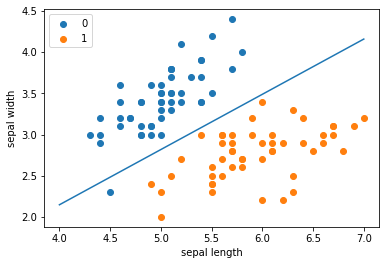

In [8]:
x_points = np.arange(4, 8)
y_ = -(logisitic_reg.w[0][0] * x_points + logisitic_reg.b) / logisitic_reg.w[0][1]
plt.plot(x_points, y_, '-')

idx_train = np.where(y_train==0)
idx_test = np.where(y_test==0)
plt.scatter(np.concatenate([x_train[idx_train, 0], x_test[idx_test, 0]], axis=1), 
            np.concatenate([x_train[idx_train, 1], x_test[idx_test, 1]], axis=1), label='0')

idx_train = np.where(y_train==1)
idx_test = np.where(y_test==1)
plt.scatter(np.concatenate([x_train[idx_train, 0], x_test[idx_test, 0]], axis=-1), 
            np.concatenate([x_train[idx_train, 1], x_test[idx_test, 1]], axis=-1), label='1')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

In [59]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

1.0

In [60]:
print(clf.coef_, clf.intercept_)

[[ 2.88868978 -2.72919824]] [-7.07994242]


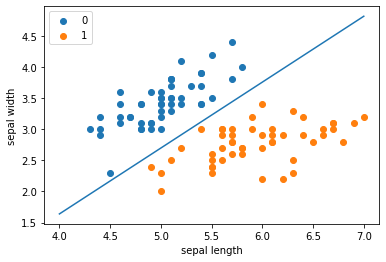

In [61]:
x_points = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_points + clf.intercept_)/clf.coef_[0][-1]
plt.plot(x_points, y_)

idx_train = np.where(y_train==0)
idx_test = np.where(y_test==0)
plt.scatter(np.concatenate([x_train[idx_train, 0], x_test[idx_test, 0]], axis=1), 
            np.concatenate([x_train[idx_train, 1], x_test[idx_test, 1]], axis=1), label='0')

idx_train = np.where(y_train==1)
idx_test = np.where(y_test==1)
plt.scatter(np.concatenate([x_train[idx_train, 0], x_test[idx_test, 0]], axis=-1), 
            np.concatenate([x_train[idx_train, 1], x_test[idx_test, 1]], axis=-1), label='1')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

In [50]:
import torch
import torch.nn as nn


class LogisiticRegression(nn.Module):

    def __init__(self, in_feats=2, out_feats=1):
        super().__init__()
        self.linear = nn.Linear(in_features=in_feats, out_features=out_feats)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out


l_r = LogisiticRegression()
l_r.zero_grad()

l_r.train()
loss_fct = nn.BCELoss()
opt = torch.optim.SGD(l_r.parameters(), lr=0.01)

x = torch.tensor(x_train, dtype=torch.float32)
y = torch.tensor(y_train, dtype=torch.float32)

for epoch in range(5000):
    out = l_r(x)
    loss = loss_fct(out, y.view(-1, 1))
    loss.backward()
    opt.step()
    l_r.zero_grad()

with torch.no_grad():
    x = torch.tensor(x_test, dtype=torch.float32)
    y = torch.tensor(y_test, dtype=torch.float32)
    y_pred = l_r(x).round().flatten()
    acc = y_pred.eq(y).sum() / float(y.shape[0])

Parameter containing:
tensor([[ 2.2445, -3.8717]], requires_grad=True) Parameter containing:
tensor([-0.0865], requires_grad=True)


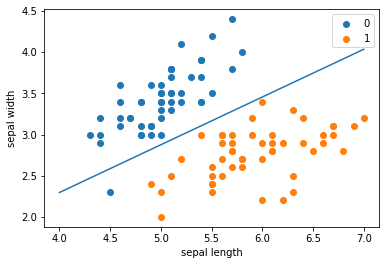

In [54]:
x_points = np.arange(4, 8)
print(l_r.linear.weight, l_r.linear.bias)
y_ = -(l_r.linear.weight[0][0].detach().numpy()*x_points + l_r.linear.bias.detach().numpy())/l_r.linear.weight[0][1].detach().numpy()
plt.plot(x_points, y_)

idx_train = np.where(y_train==0)
idx_test = np.where(y_test==0)
plt.scatter(np.concatenate([x_train[idx_train, 0], x_test[idx_test, 0]], axis=1), 
            np.concatenate([x_train[idx_train, 1], x_test[idx_test, 1]], axis=1), label='0')

idx_train = np.where(y_train==1)
idx_test = np.where(y_test==1)
plt.scatter(np.concatenate([x_train[idx_train, 0], x_test[idx_test, 0]], axis=-1), 
            np.concatenate([x_train[idx_train, 1], x_test[idx_test, 1]], axis=-1), label='1')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()